**Import Library yang kepakai**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



**Baca File csv**

In [ ]:
data = pd.read_csv('reviews.csv')
data.head(10)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
5,2022-07-09 13:20:20,The player controls sometimes disappear for no...,3,7,NaN
6,2022-07-09 13:19:21,I love the selection and the lyrics are provid...,5,0,NaN
7,2022-07-09 13:17:22,Still extremely slow when changing storage to ...,3,16,NaN
8,2022-07-09 13:16:49,It's a great app and the best mp3 music app I ...,5,0,NaN
9,2022-07-09 13:11:32,"I'm deleting this app, for the following reaso...",1,318,NaN


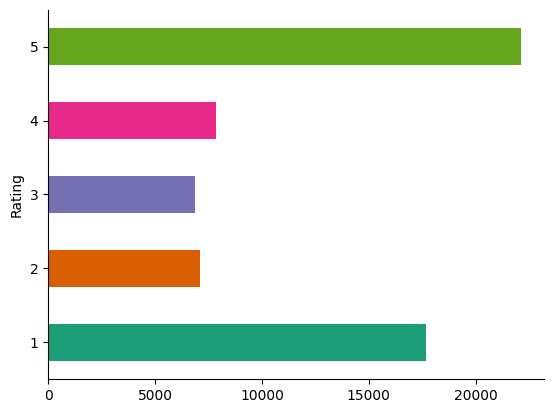

In [ ]:
# @title Rating

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Chart yang menggambarkan persentasi rating pada dataset**

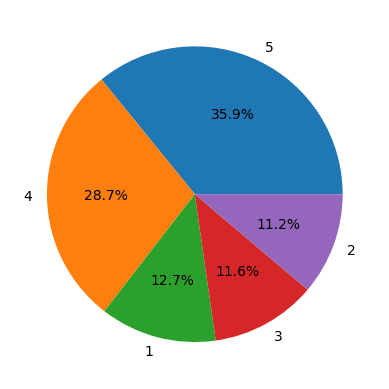

In [ ]:
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique(), autopct='%1.1f%%')
plt.show()

**Mengelompokkan rating menjadi 3 kelompok (Good, Neutral, Bad)**

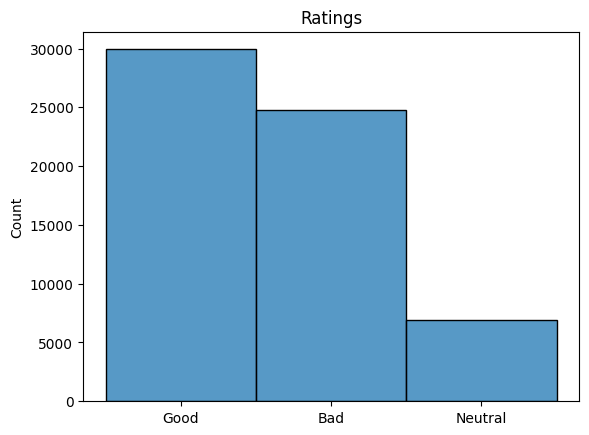

In [ ]:
def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Neutral"
    if rating == 2 or rating == 1:
        return "Bad"

data['Rating'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()

sns.histplot(data['Rating'])
plt.title('Ratings')
plt.xlabel('')
plt.show()

**Text Preprocessing**

**Lowercase**

In [ ]:
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

**Punctuation Removal & Tokenize**

In [ ]:
import re
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))

**Stopword Removal**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))

**Lemmatize**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmat = WordNetLemmatizer()
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(lemmat.lemmatize(word) for word in word.split()))

In [ ]:
X = data['Review']
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46195,), (15399,), (46195,), (15399,))

In [ ]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [ ]:
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)

In [ ]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
RanFor = RandomForestClassifier()
RanFor.fit(X_train_count, y_train)

y_predictforRanFor = RanFor.predict(X_test_count)
print('Classification Report untuk Random Forest Menggunakan CountVectorizer')
print('')
print(classification_report(y_test, y_predictforRanFor))
print(f"Accuracy: {accuracy_score(y_test, y_predictforRanFor):.3f}")

Classification Report untuk Random Forest Menggunakan CountVectorizer

              precision    recall  f1-score   support

           0       0.71      0.88      0.79      6247
           1       0.84      0.86      0.85      7485
           2       0.45      0.00      0.01      1667

    accuracy                           0.78     15399
   macro avg       0.67      0.58      0.55     15399
weighted avg       0.75      0.78      0.73     15399

Accuracy: 0.777


In [ ]:
RanFor = RandomForestClassifier()
RanFor.fit(X_train_tfidf, y_train)

y_predictforRanFor = RanFor.predict(X_test_tfidf)
print('Classification Report untuk Random Forest Menggunakan TF-IDF Vectorizer')
print('')
print(classification_report(y_test, y_predictforRanFor))
print(f"Accuracy: {accuracy_score(y_test, y_predictforRanFor):.3f}")

Classification Report untuk Random Forest Menggunakan TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.68      0.85      0.76      6247
           1       0.81      0.83      0.82      7485
           2       0.00      0.00      0.00      1667

    accuracy                           0.75     15399
   macro avg       0.50      0.56      0.53     15399
weighted avg       0.67      0.75      0.71     15399

Accuracy: 0.747


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

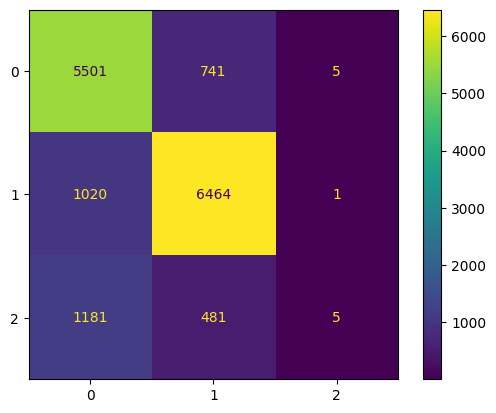

In [ ]:
actual = y_test
predicted = y_predictforRanFor

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

**Naive Bayes using Count Vector**

Classification Report untuk Naive Bayes Menggunakan CountVectorizer

              precision    recall  f1-score   support

           0       0.71      0.88      0.79      6164
           1       0.85      0.86      0.85      7521
           2       0.24      0.03      0.05      1714

    accuracy                           0.78     15399
   macro avg       0.60      0.59      0.56     15399
weighted avg       0.73      0.78      0.74     15399

Accuracy: 0.776


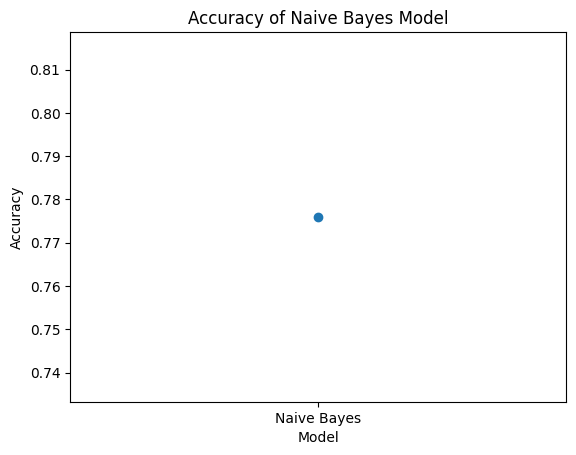

In [ ]:
NaBe = MultinomialNB()
NaBe.fit(X_train_count, y_train)

y_predictforNaBe = NaBe.predict(X_test_count)
print('Classification Report untuk Naive Bayes Menggunakan CountVectorizer')
print('')
print(classification_report(y_test, y_predictforNaBe))
print(f"Accuracy: {accuracy_score(y_test, y_predictforNaBe):.3f}")

plt.scatter(['Naive Bayes'], [accuracy_score(y_test, y_predictforNaBe)])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Naive Bayes Model')
plt.show()


**Naive Bayes Using TF-IDF**

In [ ]:
NaBe = MultinomialNB()
NaBe.fit(X_train_tfidf, y_train)

y_predictforNaBe = NaBe.predict(X_test_tfidf)
print('Classification Report untuk Naive Bayes Menggunakan TF-IDF Vectorizer')
print('')
print(classification_report(y_test, y_predictforNaBe))
print(f"Accuracy: {accuracy_score(y_test, y_predictforNaBe):.3f}")

Classification Report untuk Naive Bayes Menggunakan TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.68      0.87      0.76      6164
           1       0.84      0.83      0.83      7521
           2       0.14      0.00      0.00      1714

    accuracy                           0.76     15399
   macro avg       0.55      0.57      0.53     15399
weighted avg       0.70      0.76      0.71     15399

Accuracy: 0.755


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

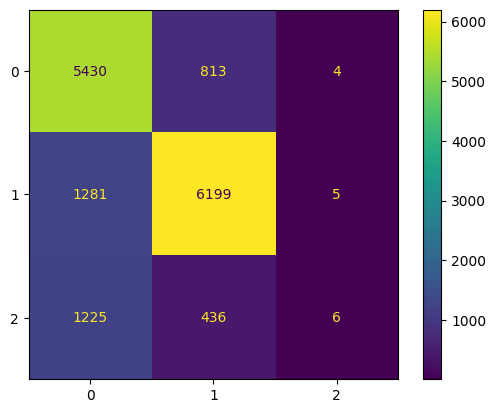

In [ ]:
actual = y_test
predicted = y_predictforNaBe

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
regression = LogisticRegression()
regression.fit(X_train_count, y_train)

y_predictforregression = regression.predict(X_test_count)
print('Classification Report untuk Linear Regression Menggunakan CountVectorizer')
print('')
print(classification_report(y_test, y_predictforregression))
print(f"Accuracy: {accuracy_score(y_test, y_predictforregression):.3f}")

Classification Report untuk Linear Regression Menggunakan CountVectorizer

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      6247
           1       0.83      0.87      0.85      7485
           2       0.29      0.11      0.16      1667

    accuracy                           0.77     15399
   macro avg       0.62      0.60      0.60     15399
weighted avg       0.74      0.77      0.75     15399

Accuracy: 0.773


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
regression = LogisticRegression()
regression.fit(X_train_tfidf, y_train)

y_predictforregression = regression.predict(X_test_tfidf)
print('Classification Report untuk Linear Regression Menggunakan TF-IDF Vectorizer')
print('')
print(classification_report(y_test, y_predictforregression))
print(f"Accuracy: {accuracy_score(y_test, y_predictforregression):.3f}")

Classification Report untuk Linear Regression Menggunakan TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      6247
           1       0.84      0.87      0.86      7485
           2       0.39      0.05      0.09      1667

    accuracy                           0.78     15399
   macro avg       0.66      0.60      0.58     15399
weighted avg       0.75      0.78      0.75     15399

Accuracy: 0.785


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

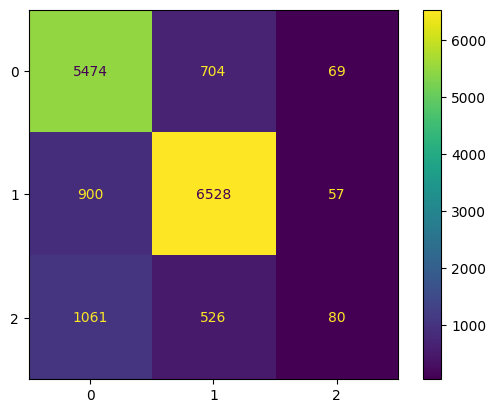

In [ ]:
actual = y_test
predicted = y_predictforregressionD

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
# save pipe.pkl to output data folder
!cp RM.ipynb /content/drive/MyDrive/outputrm

cp: cannot stat 'RM.ipynb': No such file or directory


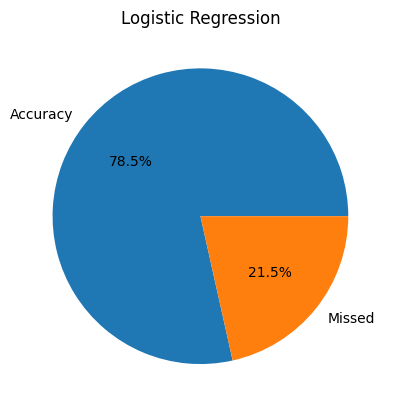

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([78.5, 21.5])
mylabels = ["Accuracy", "Missed"]
plt.title("Logistic Regression")
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show()